
#### Problem Statement:
Revenue of an US bike-sharing provider BoomBikes has considerably gone down due to the ongoing Corona pandemic.

#### The company wants to know 

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands.

<div class="alert alert-info"> Importing Data and reading it

In [1]:
# I will first importing libraries I may need 
import warnings
%matplotlib inline 
import matplotlib.colors as mcolors
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
warnings.filterwarnings('ignore')

In [2]:
# Read the given CSV file

df = pd.read_csv("D:/C1- INTL/day.csv")

In [3]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# checking if there is any null value 
count=df.isnull().sum()
print(count)
# from below we see that there are no null values 

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [5]:
df.shape

(730, 16)

In [6]:
# Create a dummy dataframe (copy of original bike df) for duplicate check
Boombike= df

# Checking for duplicates and dropping the entire duplicate row if any
Boombike.drop_duplicates(subset=None, inplace=True)

In [7]:
Boombike.shape

(730, 16)

####  1) Findings-
<br/>
The data set has 730 rows and 16 columns. <br/>It doesnot have any missing value and duplicate values too <br/>
We will extract date, Month and Year from date.

In [8]:
# extracting Month, year and date for better analysis
Boombike['Date']=pd.DatetimeIndex(Boombike["dteday"]).day
Boombike['Month']=pd.DatetimeIndex(Boombike["dteday"]).month
Boombike['Year']=pd.DatetimeIndex(Boombike["dteday"]).year
Boombike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,Date,Month,Year
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985,1,1,2018
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801,1,2,2018
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,1,3,2018
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,1,4,2018
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,1,5,2018


In [9]:
# Instant is an unique identifier of the dataset and will set the same as index.
Boombike.set_index("instant",inplace= True)
Boombike.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,Date,Month,Year
instant,,,,,,,,,,,,,,,,,,
1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985,1,1,2018
2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801,1,2,2018
3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,1,3,2018
4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,1,4,2018
5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,1,5,2018


From the given data we can see that 'instant' is an index column so we drop it.<br/>Also we will drop columns named 'dteday' and 'instant' as we extracted day, month, year from it.

In [10]:
Boombike.drop(['dteday','mnth'],axis=1,inplace=True)

In [11]:
# We will now rename the columns for the better readibility 
Boombike.rename(columns = {'hum':'Humidity','cnt':'Count','weathersit':'Weather','temp':'Temp'}, inplace = True) 
Boombike.rename(columns = {'season':'Season','holiday':'Holiday','weekday':'Weekday','workingday':'Workingday','atemp':'FeelslikeTemp'}, inplace = True)
Boombike.head()

,Season,yr,Holiday,Weekday,Workingday,Weather,Temp,FeelslikeTemp,Humidity,windspeed,casual,registered,Count,Date,Month,Year
instant,,,,,,,,,,,,,,,,
1,1,0,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985,1,1,2018
2,1,0,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801,1,2,2018
3,1,0,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,1,3,2018
4,1,0,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,1,4,2018
5,1,0,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,1,5,2018


In [12]:
Boombike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Season         730 non-null    int64  
 1   yr             730 non-null    int64  
 2   Holiday        730 non-null    int64  
 3   Weekday        730 non-null    int64  
 4   Workingday     730 non-null    int64  
 5   Weather        730 non-null    int64  
 6   Temp           730 non-null    float64
 7   FeelslikeTemp  730 non-null    float64
 8   Humidity       730 non-null    float64
 9   windspeed      730 non-null    float64
 10  casual         730 non-null    int64  
 11  registered     730 non-null    int64  
 12  Count          730 non-null    int64  
 13  Date           730 non-null    int64  
 14  Month          730 non-null    int64  
 15  Year           730 non-null    int64  
dtypes: float64(4), int64(12)
memory usage: 97.0 KB


In [13]:
# We need to change the data type of few column. 
Boombike.Workingday = Boombike.Workingday.astype(int)
Boombike.Season = Boombike.Season.astype(int)

In [14]:
Boombike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Season         730 non-null    int32  
 1   yr             730 non-null    int64  
 2   Holiday        730 non-null    int64  
 3   Weekday        730 non-null    int64  
 4   Workingday     730 non-null    int32  
 5   Weather        730 non-null    int64  
 6   Temp           730 non-null    float64
 7   FeelslikeTemp  730 non-null    float64
 8   Humidity       730 non-null    float64
 9   windspeed      730 non-null    float64
 10  casual         730 non-null    int64  
 11  registered     730 non-null    int64  
 12  Count          730 non-null    int64  
 13  Date           730 non-null    int64  
 14  Month          730 non-null    int64  
 15  Year           730 non-null    int64  
dtypes: float64(4), int32(2), int64(10)
memory usage: 91.2 KB


In [15]:
Boombike.groupby("Weekday").sum()["Workingday"]

Weekday
0      0
1    105
2    100
3     93
4    103
5    103
6      0
Name: Workingday, dtype: int32

From Weekday column I am not able to understand whether 1 is Monday or 1 is Sunday hence I am trying to find out.<br/>From above result, I can know the 0 is Sunday and 6 is Saturday.<br/>
<br/>
<div class="alert alert-info"> Data Mapping

In [16]:
#Mapping variables season, month, Weather, weekday for better understanding of the data
Boombike['Season']=Boombike.Season.map({1: 'Spring', 2: 'Summer',3:'Fall', 4:'Winter' })
Boombike['Month']=Boombike.Month.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
Boombike['Weather']=Boombike.Weather.map({1:"Clear_Few Clouds",2:"Mist_cloudy",3:"Light rain_Light snow_Thunderstorm",4:'Heavy Rain_Ice Pallets_Thunderstorm_Mist'})
Boombike['Weekday']=Boombike.Weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})

<div class="alert alert-info"> Exploratory Data Analysis

First we will analyse Numerical variables.We will also check if the data satisfies the basic assumptions of Linear regression like Linear relationship,Independence,normality, Homoscedasticity. To check that we will plot some graphs.

<div class="alert alert-warning"> Checking if variables have linear relationship.  

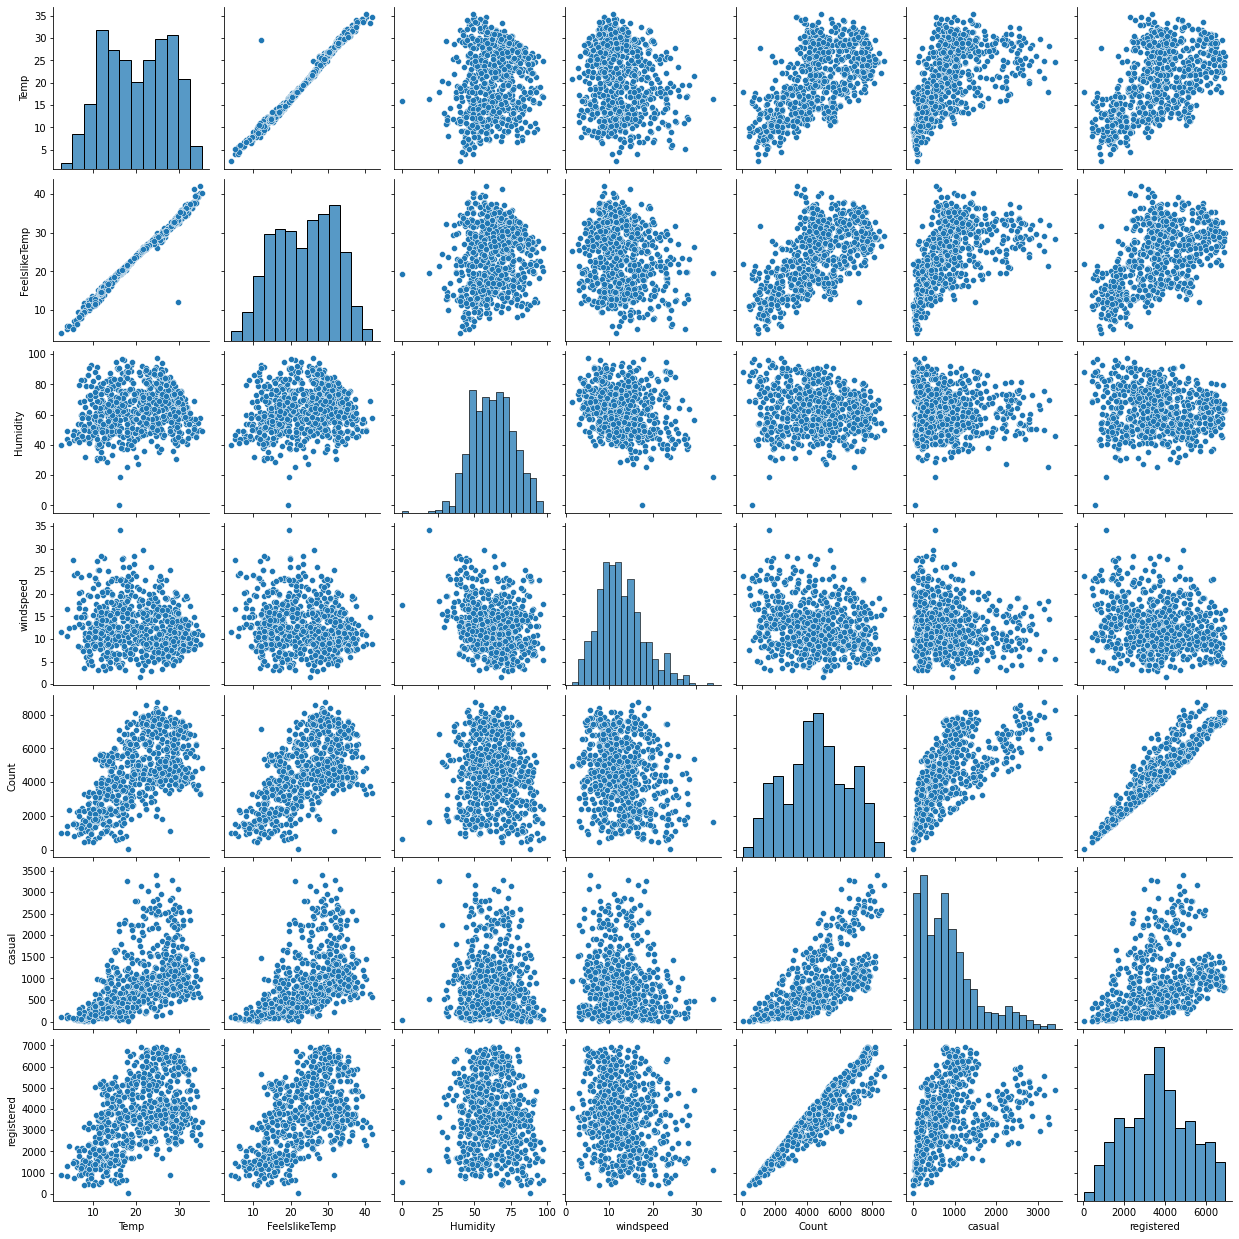

In [17]:
#Pairplot for numeric variables 
Df_num = Boombike[[ 'Temp', 'FeelslikeTemp', 'Humidity', 'windspeed','Count','casual','registered']]
sns.pairplot(Df_num)
plt.show()

#### 2) Findings - <br/>
From the above graph it looks like Independent variables have linear relationship with dependent variable.

<div class="alert alert-warning"> Checking Multicolinearity. Linear regression analysis assumes that there is no perfect exact relationship among variables.Trying to findout if any of variable have high correlation ?

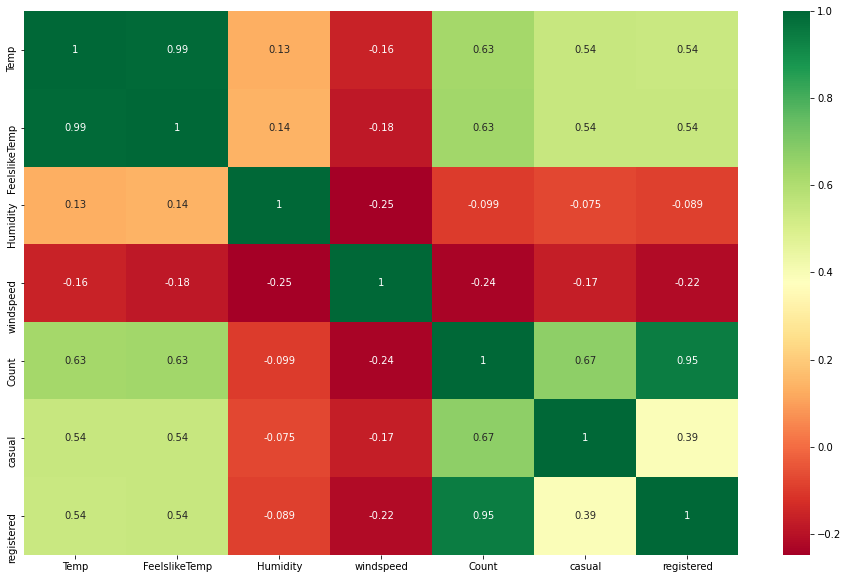

In [18]:
plt.figure(figsize = (16, 10))
sns.heatmap(Df_num.corr(), annot = True, cmap="RdYlGn")
plt.show()

In [19]:
# Visualizing Correlation in Numerical Data
Df_num.corr()

,Temp,FeelslikeTemp,Humidity,windspeed,Count,casual,registered
Temp,1.000000,0.991696,0.128565,-0.158186,0.627044,0.542731,0.539436
FeelslikeTemp,0.991696,1.000000,0.141512,-0.183876,0.630685,0.543362,0.543678
Humidity,0.128565,0.141512,1.000000,-0.248506,-0.098543,-0.075211,-0.089212
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.235132,-0.167995,-0.217914
Count,0.627044,0.630685,-0.098543,-0.235132,1.000000,0.672123,0.945411
casual,0.542731,0.543362,-0.075211,-0.167995,0.672123,1.000000,0.394137
registered,0.539436,0.543678,-0.089212,-0.217914,0.945411,0.394137,1.000000


#### 3) Findings - <br/>
- Temp and Feelslike Temp have very high linear relationship, their correlation coefficient as high as 0.99  So we can drop FeelslikeTemp variable.<br/>
- Count, registered columns are also linearly related. But when I observed that Count= registered + Casual. <br/>Hence Registered and Casual are dependent variables and hence I will drop them after doing some more analysis.


## Analyzing registered vs Casual users bike usage 

<AxesSubplot:xlabel='Temp', ylabel='casual'>

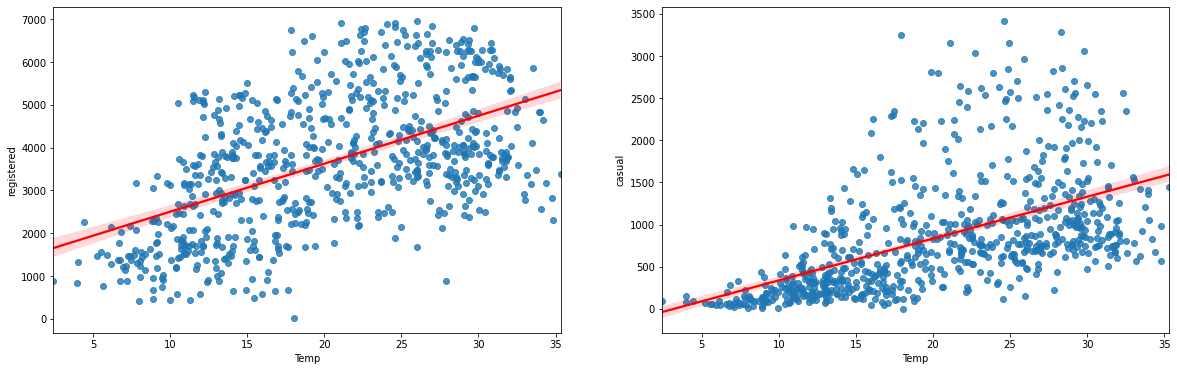

In [20]:
fig,(ax1,ax2)= plt.subplots(ncols=2, figsize=(20,6))
sns.regplot(x=Df_num['Temp'],y=Df_num['registered'],ax=ax1,line_kws={"color": "red"})
sns.regplot(x=Df_num['Temp'],y=Df_num['casual'],ax=ax2,line_kws={"color": "red"})

## as tempreture increases no of registered and casual users also increases.

<AxesSubplot:xlabel='Humidity', ylabel='casual'>

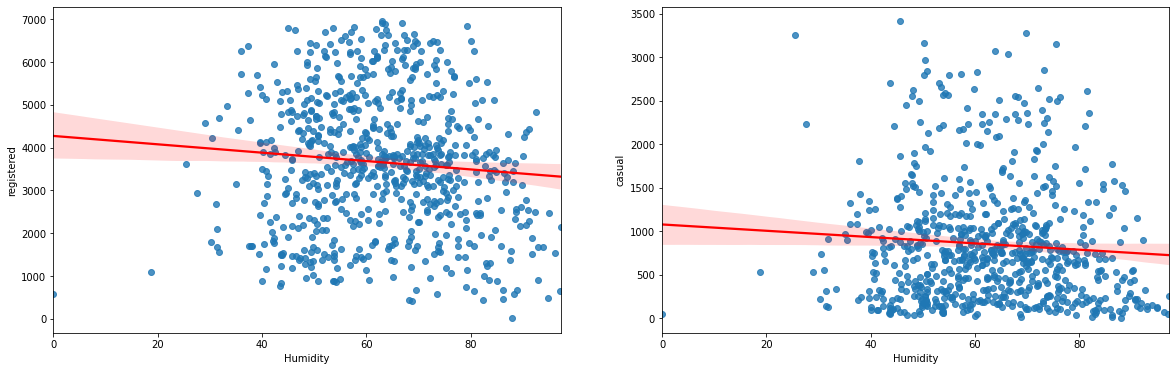

In [21]:
fig,(ax1,ax2)= plt.subplots(ncols=2, figsize=(20,6))
sns.regplot(x=Boombike['Humidity'],y=Boombike['registered'],ax=ax1,line_kws={"color": "red"})
sns.regplot(x=Boombike['Humidity'],y=Boombike['casual'],ax=ax2,line_kws={"color": "red"})

## As Humidity increases no of registered and casual users also decreases.

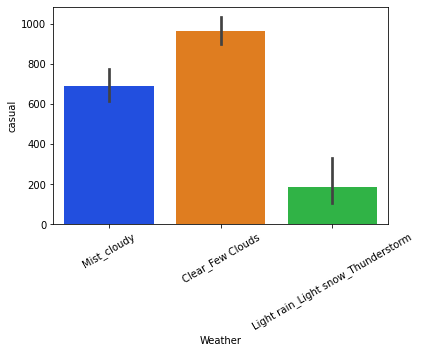

In [22]:
sns.barplot('Weather','casual',palette="bright",data=Boombike)
plt.xticks(rotation = 30)
plt.show()

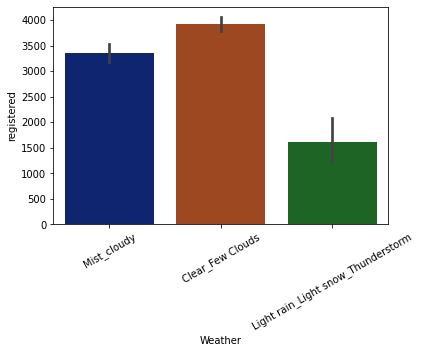

In [23]:
sns.barplot('Weather','registered',palette="dark",data=Boombike)
plt.xticks(rotation = 30)
plt.show()

# Registered users count is comparatively high even on the light rainy days than casual users

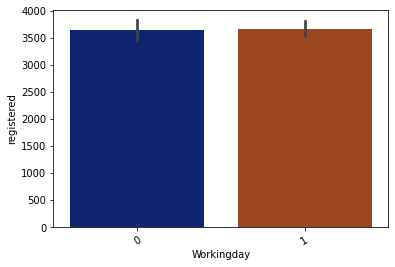

In [24]:
sns.barplot('Workingday','registered',palette="dark",data=Boombike)
plt.xticks(rotation = 30)
plt.show()

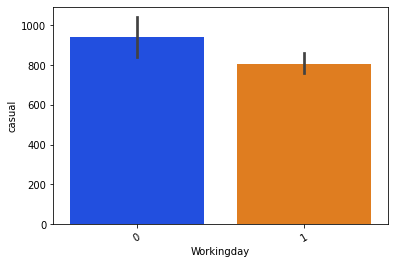

In [25]:
sns.barplot('Workingday','casual',palette="bright",data=Boombike)
plt.xticks(rotation = 30)
plt.show()

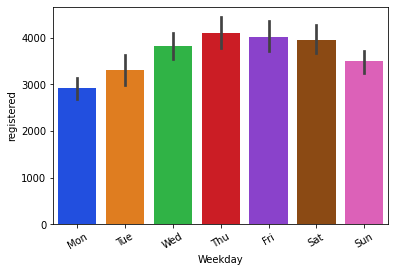

In [26]:
sns.barplot('Weekday','registered',palette="bright",data=Boombike)
plt.xticks(rotation = 30)
plt.show()

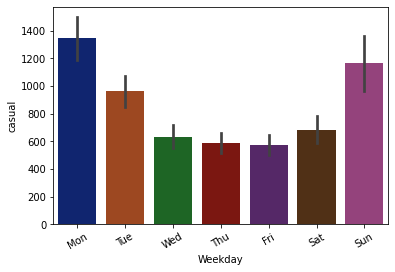

In [27]:
sns.barplot('Weekday','casual',palette="dark",data=Boombike)
plt.xticks(rotation = 30)
plt.show()

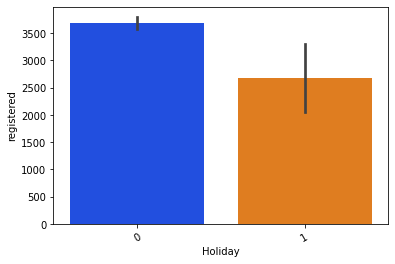

In [28]:
sns.barplot('Holiday','registered',palette="bright",data=Boombike)
plt.xticks(rotation = 30)
plt.show()

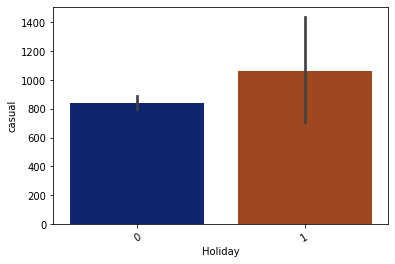

In [29]:
sns.barplot('Holiday','casual',palette="dark",data=Boombike)
plt.xticks(rotation = 30)
plt.show()

#### 4) Findings - <br/>
- As tempreture increases no of registered and casual users also increases.
- As Humidity increases no of registered and casual users also decreases.
- Registered users count is comparatively high even on the light rainy days than casual users
- Bike usage is higher on Wed ,thus,Fri,Sat  days for registered users.
- Bike usage is higher on Mon,Sun for casual users.
- casual users are using bikes more on holiday.

<div class="alert alert-warning"> Trying to see the distribution of Numeric Variables

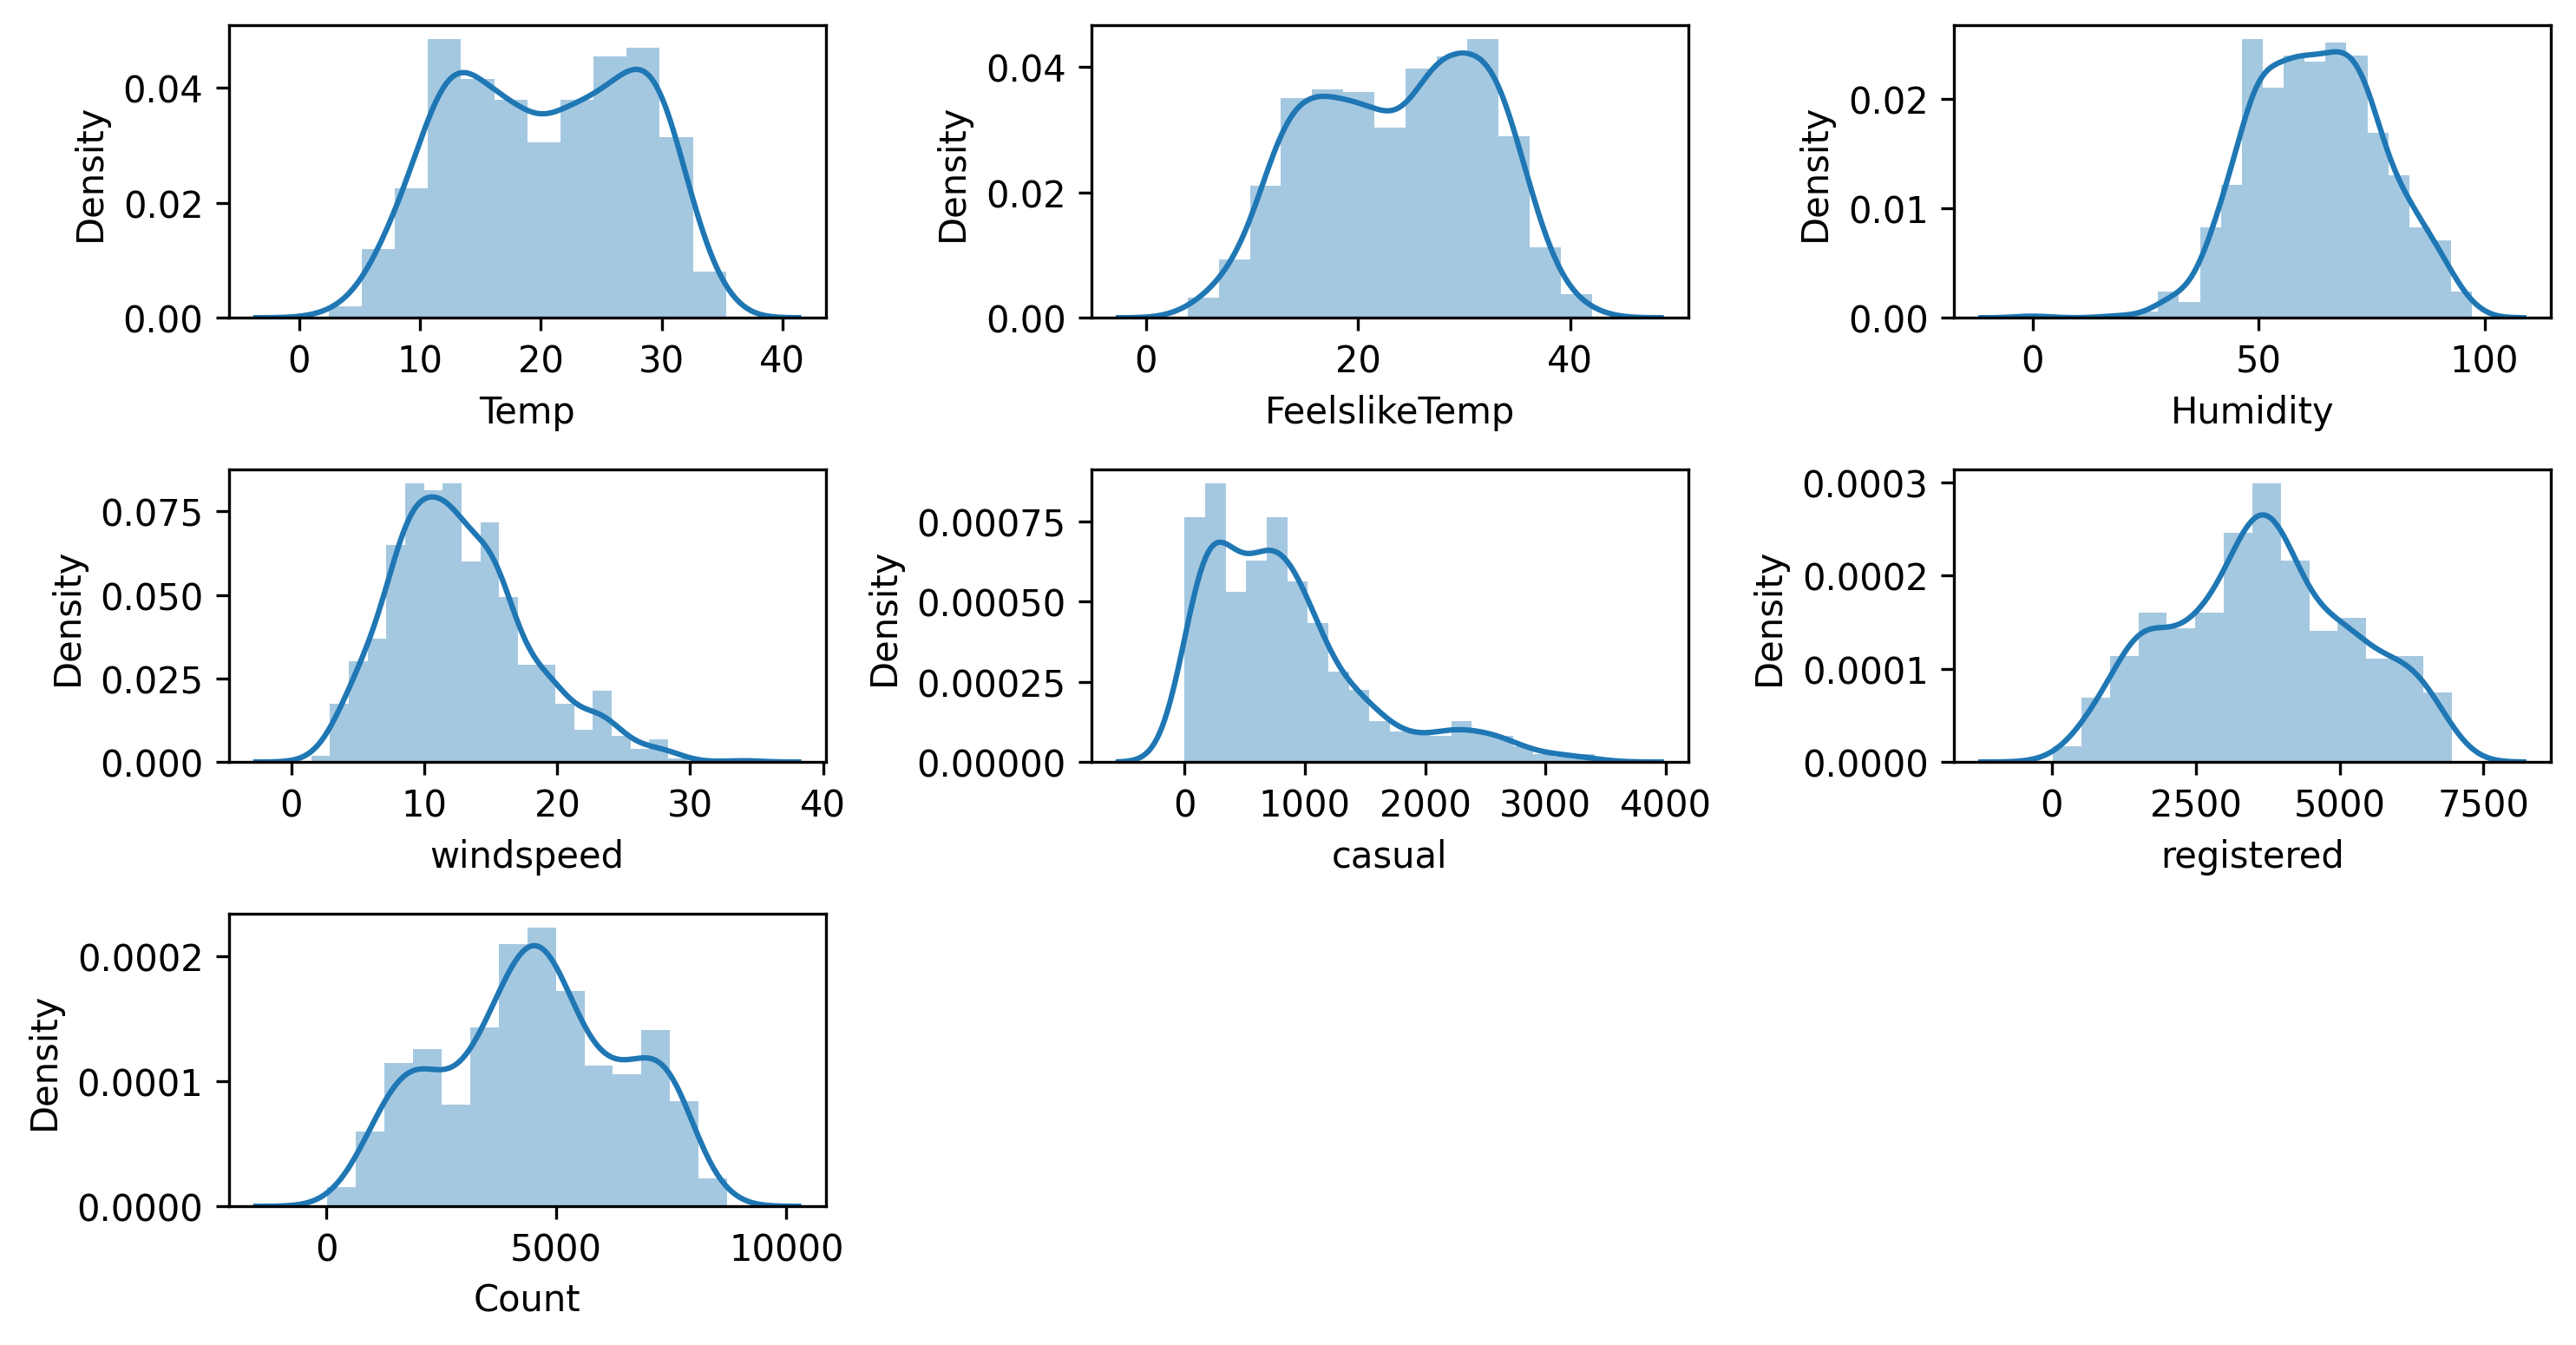

In [30]:
plt.subplots(figsize =(10,10), dpi=300)
for i,j in enumerate(["Temp","FeelslikeTemp","Humidity","windspeed","casual","registered","Count"]):
    plt.subplot(6, 3, i+1)
    plt.subplots_adjust( hspace = 1.0)
    sns.distplot(Df_num[j])
plt.tight_layout()

<div class="alert alert-warning"> Handling Skewdness.<br/> Variable 'Casual' is positively Skewed. Lets explore and transform the variable.

<AxesSubplot:>

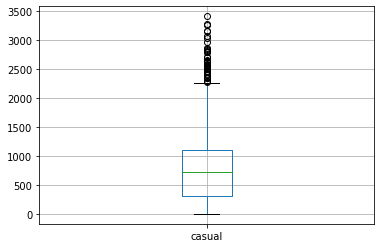

In [31]:
Df_num.boxplot(column='casual') 

Now from the box plot we can see there are too many outliers in casual column. I will tranform this column by using log function.

In [32]:
from scipy.stats import skew 
Df_num['casual'].skew()
# In the column called "casual' in  dataframe,there are no negative values or no Zeros hence I can use log transformation.
# from below table we can see windspped and Casual have very high positive skewness. 

1.2663277435764353

In [33]:
Df_num['casual']=np.sqrt(Df_num['casual'])

<AxesSubplot:>

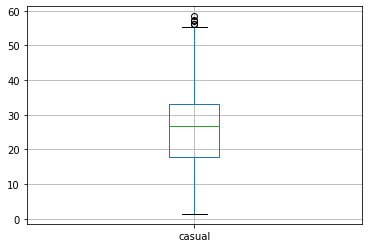

In [34]:
Df_num.boxplot(column='casual')  

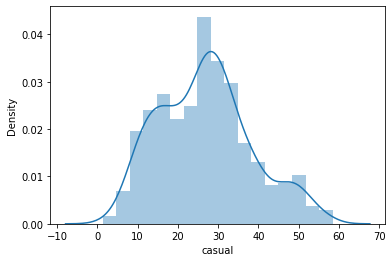

In [35]:
plt.figure()
sns.distplot( Df_num['casual'])
plt.show()

In [36]:
Df_num['casual'].skew()  # thus we have reduced the skewedness of the variable'casual'

0.3553765252564808

<AxesSubplot:>

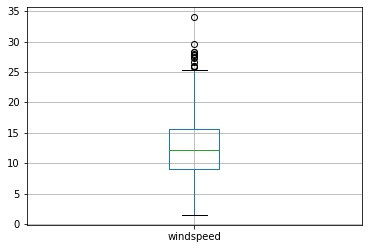

In [37]:
Df_num.boxplot(column='windspeed') 

In [38]:
# windspeed has many outliers so I will Take the 95th percentile of windspeed. 
Df_num= Df_num[Df_num['windspeed']<np.nanpercentile(Df_num['windspeed'],95)]

<AxesSubplot:>

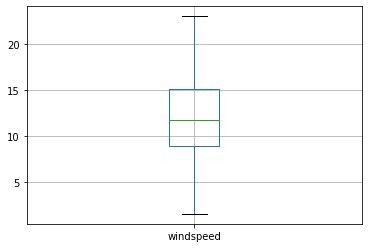

In [39]:
Df_num.boxplot(column='windspeed')
# However when I removed the outliers from windspeed in main dataset "boombike" the model was overfitting.
# Hence I am letting these be as is.

In [40]:
# Visualizing Correlation in Numerical Data
Df_num.corr()

,Temp,FeelslikeTemp,Humidity,windspeed,Count,casual,registered
Temp,1.000000,0.991725,0.107485,-0.096062,0.623315,0.627007,0.533900
FeelslikeTemp,0.991725,1.000000,0.119120,-0.117827,0.625634,0.628540,0.536866
Humidity,0.107485,0.119120,1.000000,-0.217635,-0.105869,-0.085815,-0.092487
windspeed,-0.096062,-0.117827,-0.217635,1.000000,-0.164886,-0.114776,-0.160154
Count,0.623315,0.625634,-0.105869,-0.164886,1.000000,0.731898,0.941963
casual,0.627007,0.628540,-0.085815,-0.114776,0.731898,1.000000,0.471595
registered,0.533900,0.536866,-0.092487,-0.160154,0.941963,0.471595,1.000000


### 5) Findings - <br/>

#### Normal Distribution or skwed 
- Variables like Humidity , Count and registered are normally distributed. Windspeed is little bit skwed but not much hence not tranforming it. 
- Temp and FeelslikeTemp are showing Bimodal distribution. 
- The variable 'casual' is positively skewed. We transformed the 'casual' variable to reduce its skewedness. 
- Variables  like Temp, FeelslikeTemp have similar distribution .<br/> 
- Registered and count have similar distribution.<br/>

#### Correlation 
- Temp and Feelslike Temp have very high linear relationship, their correlation coefficient as high as 0.99  So we can drop FeelslikeTemp variable.<br/>
- Count, registered columns are also linearly related. But when I observed that Count= registered + Casual. <br/>
- Hence registered and casual are dependent variables and hence I am dropping them too. 

<div class="alert alert-warning"> Analyzing Humidity and FeelslikeTemp w.r.t target Variable 'Count'

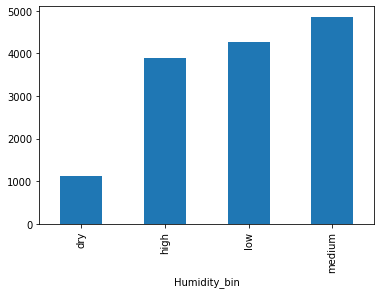

In [41]:
# Trying to analyse Bike demand as per Humidity 
Boombike["Humidity_bin"] = pd.cut(Boombike["Humidity"],4, labels= ["dry", "low", "medium", "high"])

# drop the original column
#Boombk_new.drop(['Humidity'], axis=1, inplace=True)

Boombike.groupby("Humidity_bin")["Count"].mean().sort_values().plot.bar()
plt.show()

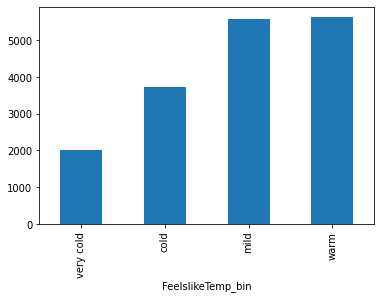

In [42]:
Boombike["FeelslikeTemp_bin"] = pd.cut(Boombike["FeelslikeTemp"],4, labels= ["very cold", "cold", "mild", "warm"])
Boombike.groupby("FeelslikeTemp_bin")["Count"].mean().sort_values().plot.bar()
plt.show()

#### 6) Findings - <br/>

- Bike rental is more when the humidity is medium , not too high or not to low.
- Bike rental is more when tempreture feels warm or mild and its very less when its very cold.

In [43]:
# Data,to find the Categorical data, I will exclude int, float,or datatime dtypes 
Df_dim = Boombike.select_dtypes(exclude=['float64','int64','datetime64'])
Df_dim.head()

,Season,Weekday,Workingday,Weather,Month,Humidity_bin,FeelslikeTemp_bin
instant,,,,,,,
1,Spring,Mon,1,Mist_cloudy,Jan,high,cold
2,Spring,Tue,1,Mist_cloudy,Feb,medium,cold
3,Spring,Wed,1,Clear_Few Clouds,Mar,low,very cold
4,Spring,Thu,1,Clear_Few Clouds,Apr,medium,very cold
5,Spring,Fri,1,Clear_Few Clouds,May,low,very cold


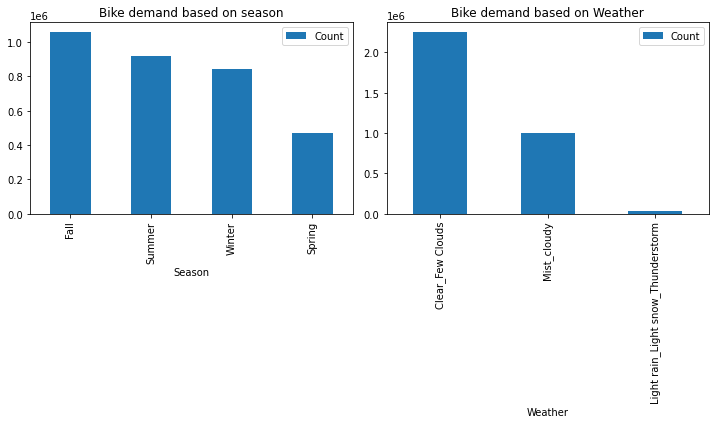

In [44]:
fig= plt.figure(figsize =(15,6))
ax1= fig.add_subplot(1,3,1, title = "Bike demand based on season")
ax2= fig.add_subplot(1,3,2, title = "Bike demand based on Weather")
Boombike.groupby('Season').sum().sort_values('Count',ascending=False)[['Count']].plot.bar(ax=ax1)
Boombike.groupby('Weather').sum().sort_values('Count',ascending=False)[['Count']].plot.bar(ax=ax2)
plt.tight_layout()
plt.show()

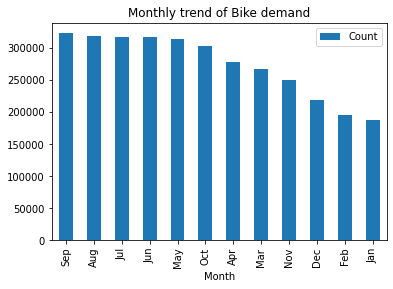

In [45]:
Boombike.groupby('Month').sum().sort_values('Count',ascending=False)[['Count']].plot.bar()
plt.title("Monthly trend of Bike demand")
plt.show()

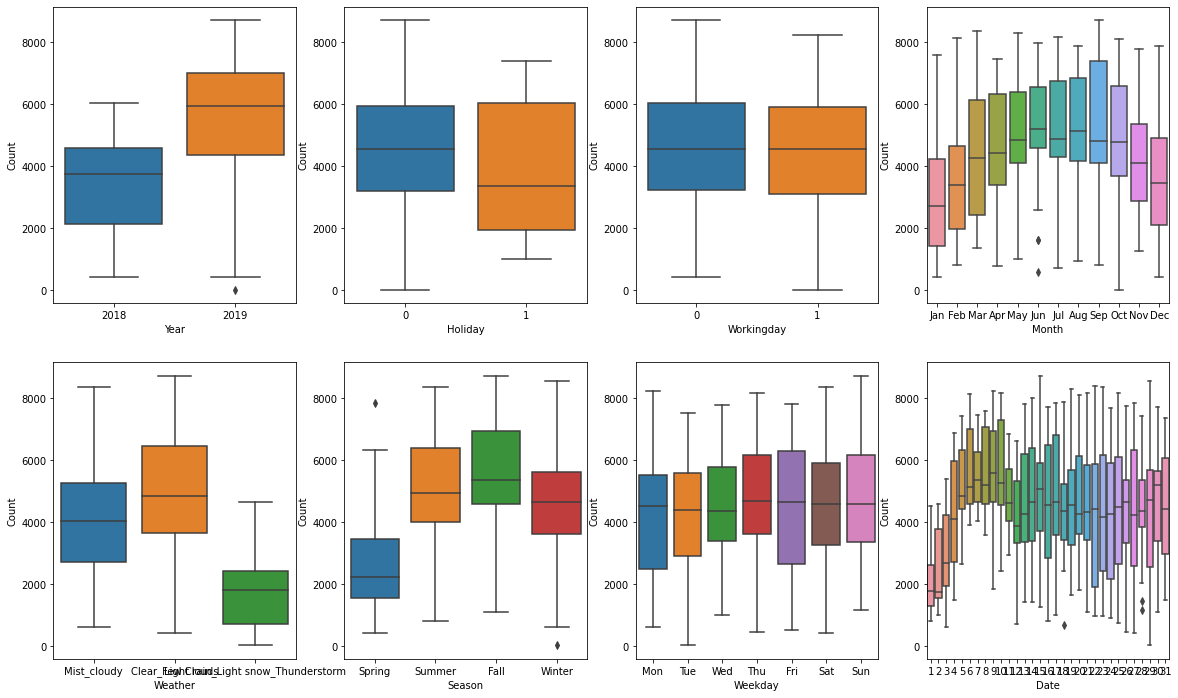

In [46]:
plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'Year', y = 'Count', data = Boombike)
plt.subplot(2,4,2)
sns.boxplot(x = 'Holiday', y = 'Count', data = Boombike)
plt.subplot(2,4,3)
sns.boxplot(x = 'Workingday', y = 'Count', data = Boombike)
plt.subplot(2,4,4)
sns.boxplot(x = 'Month', y = 'Count', data = Boombike)
plt.subplot(2,4,5)
sns.boxplot(x = 'Weather', y = 'Count', data = Boombike)
plt.subplot(2,4,6)
sns.boxplot(x = 'Season', y = 'Count', data = Boombike)
plt.subplot(2,4,7)
sns.boxplot(x = 'Weekday', y = 'Count', data = Boombike)
plt.subplot(2,4,8)
sns.boxplot(x = 'Date', y = 'Count', data = Boombike)
plt.show()

#### 7) Findings - <br/>
- Bike rentals is highest  when weather is clear with Few Clouds and there is absolutely no demand when there is heavy Rain or Snow
- Bike rentals are little higher on weekends than on weekday.
- Bike rentals are similar whether its holiday or no.But lowest number of bike rent is slightly higher on holidays than on non holidays. Also highest number of bike rent is higher on non- Holidays than Holiday.1 represents it's Holiday.0 represents it's not a Holiday.
- Bike Rentals are more in 2019 than in 2018 
- People most likely to rent a bike in Fall and Summer.
- Bike demand is low in the begining of the month.
- Highest demands of bike are in Sep, Aug, Jul,Jun,May,Oct  

<div class="alert alert-warning"> Droping Derived Variables

In [47]:
# first lets drop the variables created for EDA as we are done with EDA. 
Boombike.drop(['Year','FeelslikeTemp_bin','Humidity_bin'],axis=1,inplace=True)
Boombike.head()

,Season,yr,Holiday,Weekday,Workingday,Weather,Temp,FeelslikeTemp,Humidity,windspeed,casual,registered,Count,Date,Month
instant,,,,,,,,,,,,,,,
1,Spring,0,0,Mon,1,Mist_cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985,1,Jan
2,Spring,0,0,Tue,1,Mist_cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801,1,Feb
3,Spring,0,0,Wed,1,Clear_Few Clouds,8.050924,9.47025,43.7273,16.636703,120,1229,1349,1,Mar
4,Spring,0,0,Thu,1,Clear_Few Clouds,8.200000,10.60610,59.0435,10.739832,108,1454,1562,1,Apr
5,Spring,0,0,Fri,1,Clear_Few Clouds,9.305237,11.46350,43.6957,12.522300,82,1518,1600,1,May


In [48]:
# We will remove Temp variable as its highly correlated withFeelsliketemp ( as mentioned in Findings no 3)
Boombike.drop(['FeelslikeTemp','casual','registered'],axis=1,inplace=True)
Boombike.head()

,Season,yr,Holiday,Weekday,Workingday,Weather,Temp,Humidity,windspeed,Count,Date,Month
instant,,,,,,,,,,,,
1,Spring,0,0,Mon,1,Mist_cloudy,14.110847,80.5833,10.749882,985,1,Jan
2,Spring,0,0,Tue,1,Mist_cloudy,14.902598,69.6087,16.652113,801,1,Feb
3,Spring,0,0,Wed,1,Clear_Few Clouds,8.050924,43.7273,16.636703,1349,1,Mar
4,Spring,0,0,Thu,1,Clear_Few Clouds,8.200000,59.0435,10.739832,1562,1,Apr
5,Spring,0,0,Fri,1,Clear_Few Clouds,9.305237,43.6957,12.522300,1600,1,May


<div class="alert alert-warning"> Creating Dummy Variables

In [49]:
#Get the dummy variables for month, season, Weather, weekday and Let's drop the first column.
months=pd.get_dummies(Boombike.Month,drop_first=True)
weekdays=pd.get_dummies(Boombike.Weekday,drop_first=True)
weather_sit=pd.get_dummies(Boombike.Weather,drop_first=True)
seasons=pd.get_dummies(Boombike.Season,drop_first=True)

In [50]:
# Adding these Dummys to the original dataset for further action.
Boombike=pd.concat([months,weekdays,weather_sit,seasons,Boombike],axis=1)
Boombike.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,...,Holiday,Weekday,Workingday,Weather,Temp,Humidity,windspeed,Count,Date,Month
instant,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,1,0,0,0,0,0,0,...,0,Mon,1,Mist_cloudy,14.110847,80.5833,10.749882,985,1,Jan
2,0,0,1,0,0,0,0,0,0,0,...,0,Tue,1,Mist_cloudy,14.902598,69.6087,16.652113,801,1,Feb
3,0,0,0,0,0,0,1,0,0,0,...,0,Wed,1,Clear_Few Clouds,8.050924,43.7273,16.636703,1349,1,Mar
4,0,0,0,0,0,0,0,0,0,0,...,0,Thu,1,Clear_Few Clouds,8.200000,59.0435,10.739832,1562,1,Apr
5,0,0,0,0,0,0,0,1,0,0,...,0,Fri,1,Clear_Few Clouds,9.305237,43.6957,12.522300,1600,1,May


In [51]:
# Now lets drop 'season','month','weekday','weather' as we have created the dummies for it
Boombike.drop(['Season','Month','Weekday','Weather','Date'], axis = 1, inplace = True)
Boombike.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,...,Spring,Summer,Winter,yr,Holiday,Workingday,Temp,Humidity,windspeed,Count
instant,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,14.110847,80.5833,10.749882,985
2,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,1,14.902598,69.6087,16.652113,801
3,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,1,8.050924,43.7273,16.636703,1349
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,8.200000,59.0435,10.739832,1562
5,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,1,9.305237,43.6957,12.522300,1600


In [52]:
Boombike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 29 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Aug                                 730 non-null    uint8  
 1   Dec                                 730 non-null    uint8  
 2   Feb                                 730 non-null    uint8  
 3   Jan                                 730 non-null    uint8  
 4   Jul                                 730 non-null    uint8  
 5   Jun                                 730 non-null    uint8  
 6   Mar                                 730 non-null    uint8  
 7   May                                 730 non-null    uint8  
 8   Nov                                 730 non-null    uint8  
 9   Oct                                 730 non-null    uint8  
 10  Sep                                 730 non-null    uint8  
 11  Mon                                 730 non-n

<div class="alert alert-info"> Splitting the Data<br/>
-  Splitting the data to Train and Test: We will now split the data into TRAIN and TEST (70:30 ratio).<br/>
-  We will use train_test_split method from sklearn package for this.

In [53]:
from sklearn.model_selection import train_test_split
# We specify 'random_state' so that the train and test data set always have the same rows, respectively
df_train, df_test = train_test_split(Boombike, train_size = 0.7,random_state = 100)

In [54]:
#Rows and columns after split
print(df_train.shape)
print(df_test.shape)

(510, 29)
(220, 29)


In [55]:
df_train.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,...,Spring,Summer,Winter,yr,Holiday,Workingday,Temp,Humidity,windspeed,Count
instant,,,,,,,,,,,,,,,,,,,,,
577,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,29.246653,70.4167,11.083475,7216
427,0,0,0,0,0,0,1,0,0,0,...,1,0,0,1,0,0,16.980847,62.1250,10.792293,4066
729,0,1,0,0,0,0,0,0,0,0,...,1,0,0,1,0,1,10.489153,48.3333,23.500518,1796
483,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,15.443347,48.9583,8.708325,4220
112,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,13.803347,72.9583,14.707907,1683


In [56]:
df_test.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,...,Spring,Summer,Winter,yr,Holiday,Workingday,Temp,Humidity,windspeed,Count
instant,,,,,,,,,,,,,,,,,,,,,
185,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,29.793347,63.7917,5.459106,6043
536,0,0,0,0,0,1,0,0,0,0,...,0,1,0,1,0,1,32.082500,59.2083,7.625404,6211
300,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,19.270000,81.2917,13.250121,2659
222,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,31.433347,42.4167,13.417286,4780
153,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,29.315000,30.5000,19.583229,4968


<div class="alert alert-warning"> Scaling the features <br/>
- Here we can see Variable values are ranging from 0 to few thousands.<br/>
- We need to scale the features for ease of interpretation and faster the training of model.<br/>
- I am using minmaxscaling methond for the same.

In [57]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()# Instantiate an object
num_vars=['Temp','Humidity','windspeed','Count']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars]) # Applying scaler() to all the numerical columns except 'dummy' variables
df_train.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,...,Spring,Summer,Winter,yr,Holiday,Workingday,Temp,Humidity,windspeed,Count
instant,,,,,,,,,,,,,,,,,,,,,
577,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0.815169,0.725633,0.264686,0.827658
427,0,0,0,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0.442393,0.640189,0.255342,0.465255
729,0,1,0,0,0,0,0,0,0,0,...,1,0,0,1,0,1,0.245101,0.498067,0.663106,0.204096
483,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0.395666,0.504508,0.188475,0.482973
112,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0.345824,0.751824,0.380981,0.191095


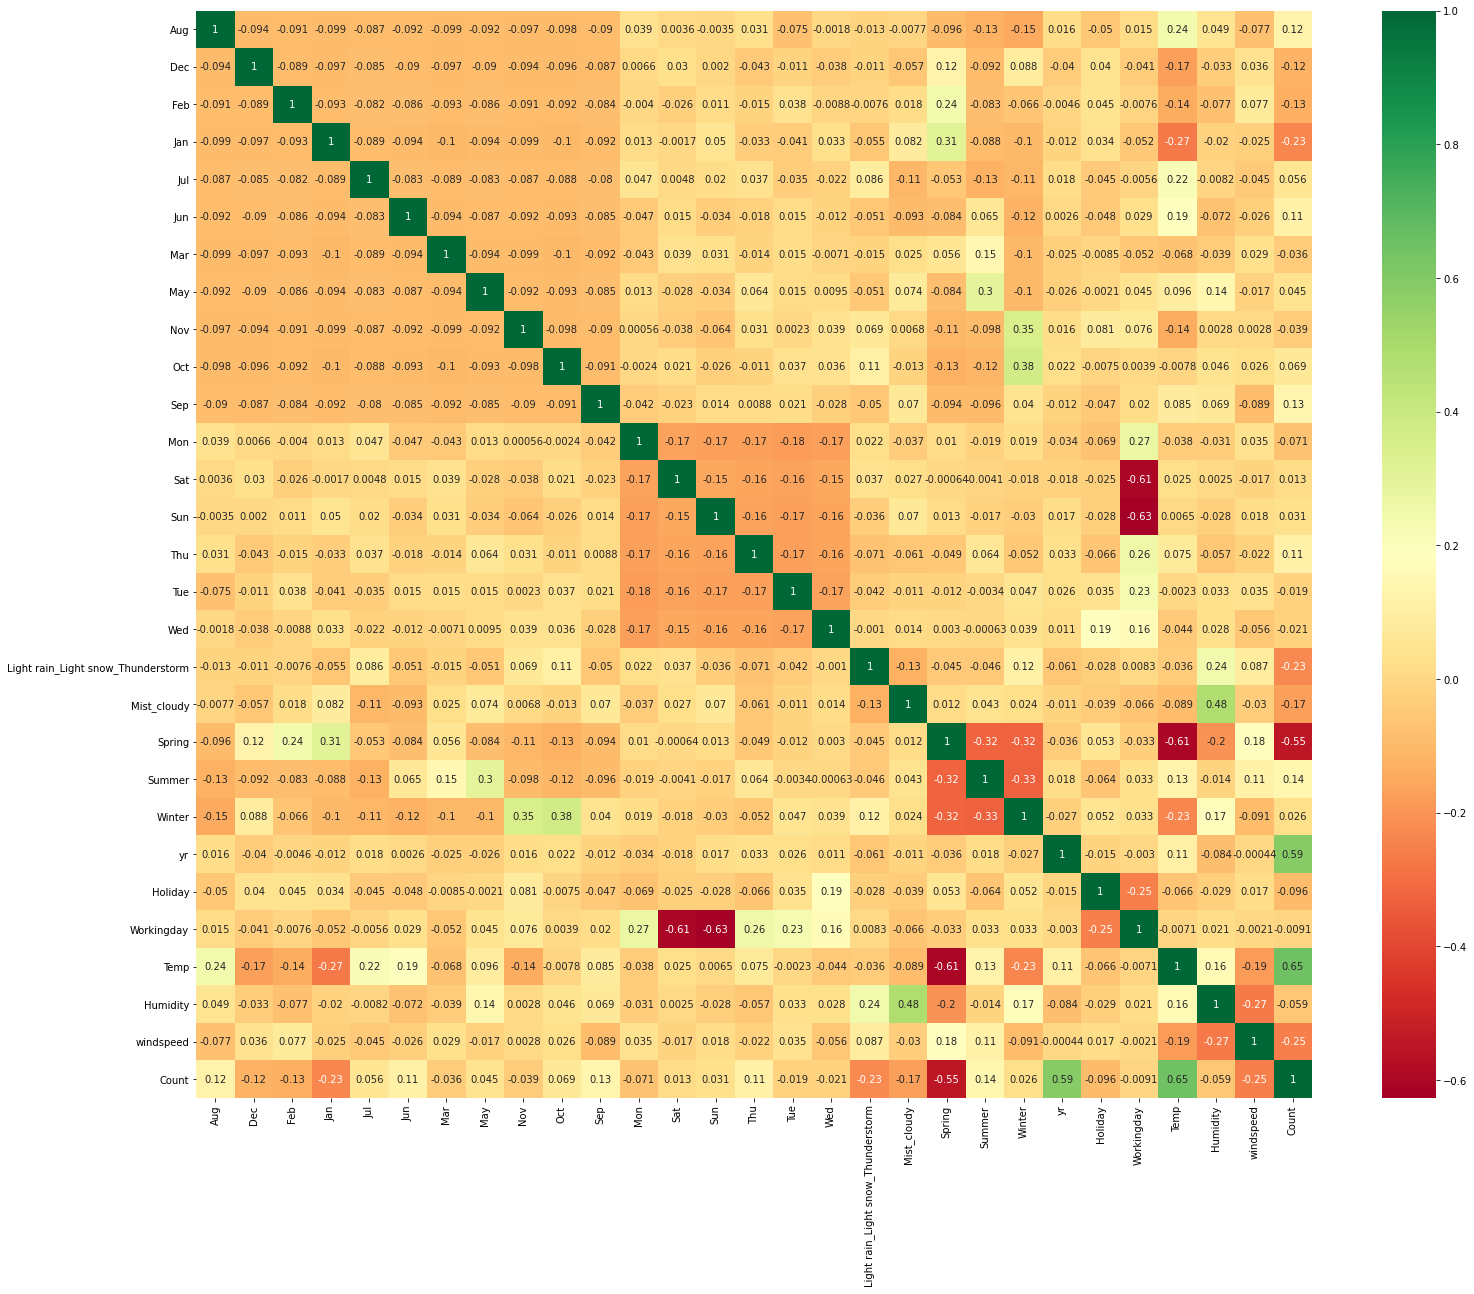

In [58]:
# Let's check the correlation coefficients to see which variables are highly correlated after scaling
# We need to ensure Little to no multicollinearity among predictors

plt.figure(figsize=(25, 20))
sns.heatmap(df_train.corr(),cmap='RdYlGn',annot = True)
plt.show()

In [59]:
df_train.describe().T
# We can see MinMax Scaling has been done properly for the Training Data as the Minimum value is 0 for each of the Feature
#and Maximum value is 1 for each of the Feature

,count,mean,std,min,25%,50%,75%,max
Aug,510.0,0.088235,0.283915,0.0,0.000000,0.000000,0.000000,1.0
Dec,510.0,0.084314,0.278131,0.0,0.000000,0.000000,0.000000,1.0
Feb,510.0,0.078431,0.269113,0.0,0.000000,0.000000,0.000000,1.0
Jan,510.0,0.092157,0.289531,0.0,0.000000,0.000000,0.000000,1.0
Jul,510.0,0.072549,0.259649,0.0,0.000000,0.000000,0.000000,1.0
Jun,510.0,0.080392,0.272166,0.0,0.000000,0.000000,0.000000,1.0
Mar,510.0,0.092157,0.289531,0.0,0.000000,0.000000,0.000000,1.0
May,510.0,0.080392,0.272166,0.0,0.000000,0.000000,0.000000,1.0
Nov,510.0,0.088235,0.283915,0.0,0.000000,0.000000,0.000000,1.0
Oct,510.0,0.090196,0.286744,0.0,0.000000,0.000000,0.000000,1.0


Comments <br/>
- From the heatmap I can see Spring is correlated to the 'count' variable. <br/>
- Working day, Sat & Sun are highly correlated to eachother.Temp and & spring are correlated to eachother.<br/> 
- This plot helps to interpret the data well and identify the variables that can turn out to be useful in building the model
- This heat map shows that variables temp ,year are highly correlated to the target variable 'count'.

<div class="alert alert-info"> Building model on Train Data. 

In [60]:
y_train = df_train.pop('Count')
X_train = df_train

In [61]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor 
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

<div class="alert alert-warning"> Feature Selection

In [62]:
# I am going to use RFE approch for feature seclection. 
#I will start with 15 variables and will use mixed approch to build a model.
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [63]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Aug', False, 9),
 ('Dec', False, 6),
 ('Feb', False, 8),
 ('Jan', False, 2),
 ('Jul', True, 1),
 ('Jun', False, 7),
 ('Mar', False, 11),
 ('May', False, 14),
 ('Nov', False, 5),
 ('Oct', False, 13),
 ('Sep', True, 1),
 ('Mon', False, 4),
 ('Sat', True, 1),
 ('Sun', True, 1),
 ('Thu', False, 12),
 ('Tue', False, 3),
 ('Wed', False, 10),
 ('Light rain_Light snow_Thunderstorm', True, 1),
 ('Mist_cloudy', True, 1),
 ('Spring', True, 1),
 ('Summer', True, 1),
 ('Winter', True, 1),
 ('yr', True, 1),
 ('Holiday', True, 1),
 ('Workingday', True, 1),
 ('Temp', True, 1),
 ('Humidity', True, 1),
 ('windspeed', True, 1)]

In [64]:
#Columns where RFE support is True
col = X_train.columns[rfe.support_]
col

Index(['Jul', 'Sep', 'Sat', 'Sun', 'Light rain_Light snow_Thunderstorm',
       'Mist_cloudy', 'Spring', 'Summer', 'Winter', 'yr', 'Holiday',
       'Workingday', 'Temp', 'Humidity', 'windspeed'],
      dtype='object')

In [65]:
#Columns where RFE support is False
X_train.columns[~rfe.support_] 

Index(['Aug', 'Dec', 'Feb', 'Jan', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Mon',
       'Thu', 'Tue', 'Wed'],
      dtype='object')

<div class="alert alert-info"> Building model using statsmodel

In [66]:
# Creating X_test dataframe with RFE selected variables

X_train_rfe = X_train[col]

In [67]:
# Adding a constant variable 

import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [68]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [69]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     168.0
Date:                Mon, 04 Apr 2022   Prob (F-statistic):          6.52e-183
Time:                        15:07:19   Log-Likelihood:                 500.08
No. Observations:                 510   AIC:                            -968.2
Df Residuals:                     494   BIC:                            -900.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

<div class="alert alert-warning"> Checking VIF<br/>
Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating VIF is 
 $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [70]:
#Drop the constant term B0
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

In [71]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Workingday,41.46
13,Humidity,36.37
12,Temp,21.72
3,Sun,8.42
2,Sat,8.06
6,Spring,5.54
14,windspeed,5.38
8,Winter,4.06
7,Summer,2.79
5,Mist_cloudy,2.41


In [72]:
#Coloumn 'Sun' has high P value so need to drop the same. 
X_train_new_1 = X_train_rfe.drop(["Sun"], axis = 1)

In [73]:
# Building model without variable 'Sun'

X_train_lm_1 = sm.add_constant(X_train_new_1)
lm_1 = sm.OLS(y_train,X_train_lm_1).fit()
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     180.2
Date:                Mon, 04 Apr 2022   Prob (F-statistic):          6.15e-184
Time:                        15:07:19   Log-Likelihood:                 499.82
No. Observations:                 510   AIC:                            -969.6
Df Residuals:                     495   BIC:                            -906.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [74]:
#Drop the constant term B0
X_train_lm_1 = X_train_lm_1.drop(['const'], axis=1)

In [75]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new_1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,Humidity,28.67
11,Temp,15.63
10,Workingday,5.88
13,windspeed,4.70
5,Spring,3.91
7,Winter,3.19
6,Summer,2.41
4,Mist_cloudy,2.35
8,yr,2.08
2,Sat,1.85


In [76]:
#Dropping 'Sat' as its P value  is very high
X_train_new_2 = X_train_lm_1.drop(["Sat"], axis = 1)

In [77]:
#Building a model without 'Sun' and 'Sat'
X_train_lm_2 = sm.add_constant(X_train_new_2)
lm_2 = sm.OLS(y_train,X_train_lm_2).fit()
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     194.4
Date:                Mon, 04 Apr 2022   Prob (F-statistic):          4.57e-185
Time:                        15:07:19   Log-Likelihood:                 499.76
No. Observations:                 510   AIC:                            -971.5
Df Residuals:                     496   BIC:                            -912.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [78]:
#Drop the constant
X_train_lm_2=X_train_lm_2.drop(['const'],axis=1)

In [79]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new_2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Humidity,28.17
10,Temp,15.16
12,windspeed,4.68
4,Spring,3.79
9,Workingday,3.67
6,Winter,3.12
5,Summer,2.38
3,Mist_cloudy,2.34
7,yr,2.08
2,Light rain_Light snow_Thunderstorm,1.25


In [80]:
#Dropping 'Humidity' as its VIF score is very high
X_train_new_3 = X_train_lm_2.drop(["Humidity"], axis = 1)

In [81]:
#Building a model without 'Sun' and 'Sat','Humidity'
X_train_lm_3 = sm.add_constant(X_train_new_3)
lm_3 = sm.OLS(y_train,X_train_lm_3).fit()
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     204.5
Date:                Mon, 04 Apr 2022   Prob (F-statistic):          1.90e-183
Time:                        15:07:19   Log-Likelihood:                 493.14
No. Observations:                 510   AIC:                            -960.3
Df Residuals:                     497   BIC:                            -905.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [82]:
#Drop constant 
X_train_lm_3=X_train_lm_3.drop(['const'],axis=1)

In [83]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new_3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,Temp,4.93
11,windspeed,4.62
9,Workingday,3.54
4,Spring,2.19
7,yr,2.07
5,Summer,1.96
6,Winter,1.83
3,Mist_cloudy,1.55
0,Jul,1.21
1,Sep,1.14


In [84]:
#Dropping 'Jul' as it has very high P value
X_train_new_4 = X_train_lm_3.drop(["Jul"], axis = 1)

In [85]:
#Building a model without 'Sun' and 'Sat','Humidity', 'Jul'
X_train_lm_4 = sm.add_constant(X_train_new_4)
lm_4 = sm.OLS(y_train,X_train_lm_4).fit()
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     221.1
Date:                Mon, 04 Apr 2022   Prob (F-statistic):          1.25e-183
Time:                        15:07:19   Log-Likelihood:                 490.77
No. Observations:                 510   AIC:                            -957.5
Df Residuals:                     498   BIC:                            -906.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [86]:
#Drop constant 
X_train_lm_4=X_train_lm_4.drop(['const'],axis=1)

In [87]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new_4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,windspeed,4.62
9,Temp,4.59
8,Workingday,3.54
3,Spring,2.19
6,yr,2.07
4,Summer,1.89
5,Winter,1.80
2,Mist_cloudy,1.55
0,Sep,1.12
7,Holiday,1.11


In [88]:
#Dropping 'Workingday' as it has higher P value
X_train_new_5= X_train_lm_4.drop(['Workingday'], axis=1)

In [89]:
#Building a model without 'Sun' and 'Sat','Humidity', 'Jul', 'Workingday'
X_train_lm_5 =sm.add_constant(X_train_new_5)
lm_5=sm.OLS(y_train,X_train_lm_5).fit()
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     240.3
Date:                Mon, 04 Apr 2022   Prob (F-statistic):          1.33e-183
Time:                        15:07:20   Log-Likelihood:                 487.86
No. Observations:                 510   AIC:                            -953.7
Df Residuals:                     499   BIC:                            -907.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [90]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new_5
#Drop the constant
X = X_train_lm_5.drop(['const'],axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,windspeed,4.60
8,Temp,3.67
6,yr,2.07
3,Spring,1.96
4,Summer,1.81
5,Winter,1.61
2,Mist_cloudy,1.54
0,Sep,1.12
1,Light rain_Light snow_Thunderstorm,1.08
7,Holiday,1.04


<div class="alert alert-success" role="alert"> Comments<br/>
    - Now that the P values are low than 0.05 and VIF is lower than 5 then we can say its probably the final model.<br/>
    - R-squared measures the strength of the relationship between the model and the dependent variable on a convenient 0 – 100% scale.<br/> - We have the R-square value of 0.828 or 82.8%<br/>
    - The adjusted R-squared adjusts for the number of terms in the model. And we got it around 0.825 or 82.5%

<div class="alert alert-info"> Residual Analysis of the train data.<br/>
    One of the assumption of Linear regression is  the error terms are also normally distributed. Now I will check the same by ploting histogram.

In [91]:
X_train_lm_5

,const,Sep,Light rain_Light snow_Thunderstorm,Mist_cloudy,Spring,Summer,Winter,yr,Holiday,Temp,windspeed
instant,,,,,,,,,,,
577,1.0,0,0,0,0,0,0,1,0,0.815169,0.264686
427,1.0,0,0,1,1,0,0,1,0,0.442393,0.255342
729,1.0,0,0,0,1,0,0,1,0,0.245101,0.663106
483,1.0,0,0,1,0,1,0,1,0,0.395666,0.188475
112,1.0,0,0,1,0,1,0,0,0,0.345824,0.380981
...,...,...,...,...,...,...,...,...,...,...,...
579,1.0,0,0,0,0,0,0,1,0,0.863973,0.187140
54,1.0,0,0,0,1,0,0,0,0,0.202618,0.111379
351,1.0,0,0,1,0,0,1,0,0,0.248216,0.431816


In [92]:
#y train predicted
y_train_pred = lm_5.predict(X_train_lm_5)

Text(0.5, 0, 'Errors')

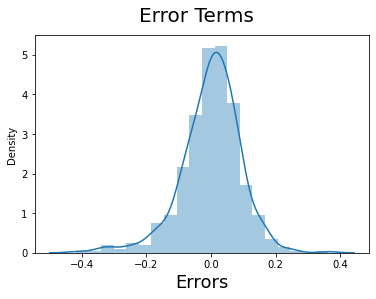

In [93]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

<div class="alert alert-success" role="alert"> Errors are normally distributed hence assumption of linear regression holds true

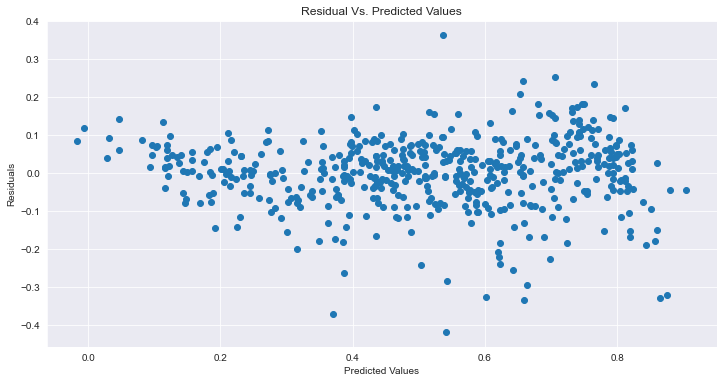

In [94]:
res = (y_train - y_train_pred)
plt.figure(figsize = (12,6))
sns.set_style("darkgrid")
plt.scatter(y_train_pred,res)
plt.title('Residual Vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

<div class="alert alert-success" role="alert"> We can see there is no specific Pattern observed in the Error Terms with respect to Prediction, hence we can say Error terms are independent of each other. Hence we can say residuals are homoscedastic

<div class="alert alert-info">  Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. fourth model.

In [95]:
num_vars = ['Temp', 'Humidity', 'windspeed', 'Count']
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [96]:
df_test.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,...,Spring,Summer,Winter,yr,Holiday,Workingday,Temp,Humidity,windspeed,Count
instant,,,,,,,,,,,,,,,,,,,,,
185,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0.831783,0.657364,0.084219,0.692706
536,0,0,0,0,0,1,0,0,0,0,...,0,1,0,1,0,1,0.901354,0.610133,0.153728,0.712034
300,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0.511964,0.837699,0.334206,0.303382
222,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0.881625,0.437098,0.339570,0.547400
153,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0.817246,0.314298,0.537414,0.569029


In [97]:
#Dividing into X_test and y_test
y_test = df_test.pop('Count')
X_test = df_test

In [98]:
#Columns
X_train_new_5.columns

Index(['Sep', 'Light rain_Light snow_Thunderstorm', 'Mist_cloudy', 'Spring',
       'Summer', 'Winter', 'yr', 'Holiday', 'Temp', 'windspeed'],
      dtype='object')

In [99]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new_5.columns]

# Adding a constant variable 
X_test_new_1 = sm.add_constant(X_test_new)
X_test_new_1.head()

,const,Sep,Light rain_Light snow_Thunderstorm,Mist_cloudy,Spring,Summer,Winter,yr,Holiday,Temp,windspeed
instant,,,,,,,,,,,
185,1.0,0,0,1,0,0,0,0,1,0.831783,0.084219
536,1.0,0,0,0,0,1,0,1,0,0.901354,0.153728
300,1.0,0,0,1,0,0,1,0,0,0.511964,0.334206
222,1.0,0,0,0,0,0,0,0,0,0.881625,0.339570
153,1.0,0,0,0,0,1,0,0,0,0.817246,0.537414


In [100]:
# Making predictions
y_pred = lm_5.predict(X_test_new_1)

In [101]:
#Evaluate R-square for test
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8023724505633265

In [102]:
X_test_new.shape

(220, 10)

In [103]:
#Adjusted R^2
#adj r2=1-(1-R2)*(n-1)/(n-p-1)

#n =sample size , p = number of independent variables

Adj_r2=1-(1-0.80381)*(11-1)/(11-1-1)
print(Adj_r2)

0.7820111111111111


<div class="alert alert-info">  Model Evaluation<br/>

Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

<Figure size 432x288 with 0 Axes>

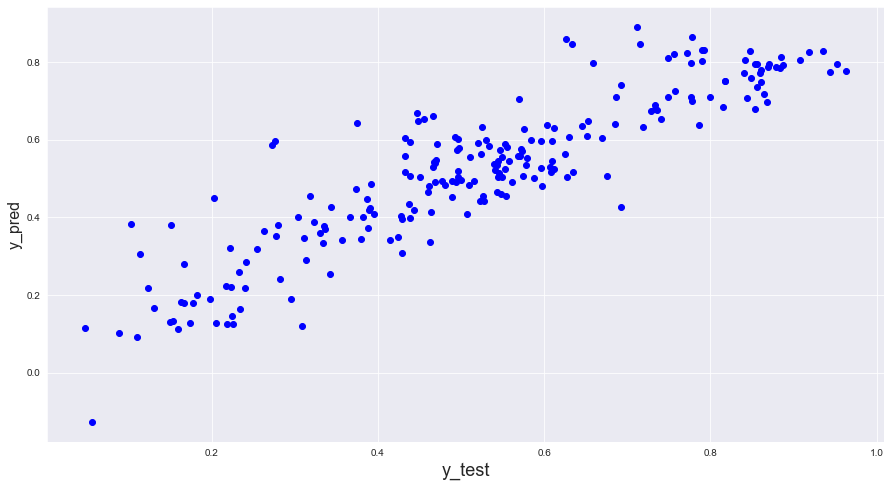

In [104]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.figure(figsize=(15,8))
plt.scatter(y_test,y_pred,color='blue')
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

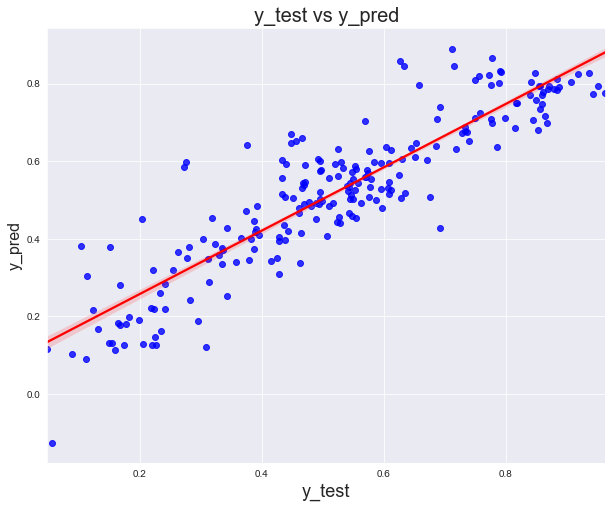

In [105]:
#Regression plot
plt.figure(figsize=(10,8))
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})

plt.title('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label
plt.show()    

<div class="alert alert-success"> We have a model that seems good enough to predict demand of bikes. <br/>
    The actual and predicted count i.e demand significantly overlapped, thus indicating that the model is able to explain the change in demand very well.

<div class="alert alert-info">  

Equation of the Best fitted line

In [106]:
Cofficients = round(lm_5.params,2)
beta = Cofficients.sort_values(ascending = False)
beta

Temp                                  0.47
yr                                    0.23
const                                 0.21
Winter                                0.08
Sep                                   0.07
Summer                                0.05
Spring                               -0.07
Mist_cloudy                          -0.08
Holiday                              -0.08
windspeed                            -0.15
Light rain_Light snow_Thunderstorm   -0.27
dtype: float64

In [107]:
for i in range(0, len(beta)):
    print(beta[i],'*',beta.index[i],end ='')
    print(' + ',end ='')

0.47 * Temp + 0.23 * yr + 0.21 * const + 0.08 * Winter + 0.07 * Sep + 0.05 * Summer + -0.07 * Spring + -0.08 * Mist_cloudy + -0.08 * Holiday + -0.15 * windspeed + -0.27 * Light rain_Light snow_Thunderstorm + 

<div class="alert alert-info">  

Equation of the Best fitted line
    
Count = 0.47 * Temp + 0.23 * yr + 0.21 * const + 0.08 * Winter + 0.07 * Sep + 0.05 * Summer + -0.07 * Spring + -0.08 * Mist_cloudy + -0.08 * Holiday + -0.15 * windspeed + -0.27 * Light rain_Light snow_Thunderstorm  

In [108]:
y_test_pred = lm_5.predict(X_test_new_1)

#Comparing performance on train and test set, Evaluating model.

print(r2_score(y_test,y_test_pred))
print(r2_score(y_train,y_train_pred))

# These are exact same no we got from stats model. 

0.8023724505633265
0.8280641735001495


In [109]:
# calculating Means squared error & root mean squared error for test data set 
from sklearn import metrics
print ('MSE:', metrics.mean_squared_error(y_test,y_test_pred))
print ('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_test_pred)))
# The values of MSE and RMSE shows our model is good.

MSE: 0.009449418887140387
RMSE: 0.09720812150813525


<div class="alert alert-success">  Final Result Comparison between Train model and Test:<br/>
- Train R^2 : 0.828 or 82.8%<br/>
- Train Adjusted R^2 : 0.825 or 82.5%<br/>
- Test R^2: 0.8023 or 80.23%<br/>
- Test Adjusted R^2: 0.7820 or 78.20% <br/>
- Difference in R^2 between train and test: 2.57% % <br/>
- Difference in adjusted R^2 between Train and test: 4.3 % which is less than 5%<br/> 
    
   Hence we can conclude that it is the best model !

## SUMMARY 

## The company wants to know
#### Which variables are significant in predicting the demand for shared bikes.
There are 9 predictors I got in this model 
The Independednt variables used in final model are Sep ,Lightrain_Light snow_Thunderstorm , mistyCloudy,Spring,Summer,Winter,yr,Holiday,Temp,windspeed 

#### How well those variables describe the bike demands.
Expression of Multi Linear Regression is 
y=a+ b1x1+ b2x2 .....+bnxn where b1,b2 are coefficient of independent variables.bn is change in ('Count') here with unit change in Xn where rest of the variables are constant.

3 most imnportant features are Light rain_Light snow_Thunderstorm, windspeed ,Temp. This was decided by inspecting absolute value of their coefficients.

Negative sign means variables are negatively correlated with target variable. Light rain_Light snow_Thunderstorm ,Spring,Mist_cloudy,Holiday,Windspeed are negatively correlated. We can give some offers etc to increase the bike demands.

Temp, yr,Winter,Sep,Summer are positively related.We can focus more on these as they have more influence on bike rentals. 

Company need to think how to tackle with bad weather condition and come up with sort of solution which protect users from Raining.

Demand of Bike Rent has been significantly increased in the 2019 than 2018 so it is clear sign that Boom Bikes is doing a good Business.Even though without expending a single cent BOOM Bikes can expect their business to grow by 21%


#### About the Model
This linear model is validated against the several assumptions of linear regression.like linearity, normally distributed error & constant variance of error.

Prob of F statistics is 1.33e-183 which is less than 0.05, hence I can conclude that the overall model fit is significant. 
